In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
X=np.load("X.npy") # This input is having sign language images of digits 0 to 9
Y=np.load("Y.npy") # The encoded label outputs of digits 0 to 9

In [ ]:
X.shape # There are 2064 images are there in total in this datset. Each image is 64x64 in size

(2062, 64, 64)

In [ ]:
X[600,:,:].shape # Accessing one single image (600th Image)

(64, 64)

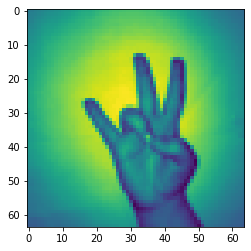

In [ ]:
plt.imshow(X[600,:,:]) # Displaying one single image

In [ ]:
Y[600] 
# encoded output of 600th image. 
#We can see one at the index position of 2. Hence this is a sign representation of digit 2

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Split the data in to train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=48)

In [ ]:
xtrain.shape, xtest.shape

((1649, 64, 64), (413, 64, 64))

In [ ]:
64*64

4096

In [ ]:
Xtrain=xtrain.reshape(1649,64*64) 
# Reshape the matrix image data into a vector
# 64x64 image reshaped into 1x4096
# Totally 1649 images are there in Xtrain, hence now the xtrain size is 1649x4096

In [ ]:
Xtrain.shape

(1649, 4096)

In [ ]:
Xtest=xtest.reshape(413,64*64) # Simillary reshape the Xtest also

In [ ]:
Xtest.shape

(413, 4096)

In [ ]:
# Normalize the data between 0 to 1. Image pixels always have the maximum value as 255. 
# Divide each pixel with 255, so the data scaled between 0 to 1
Xtrain1=Xtrain/255.
Xtest1=Xtest/255.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
img_classifier=Sequential() 
# Define the neural network as a sequentail model (Sequence of layers from input to output)

In [ ]:
img_classifier.add(Dense(units=512,activation='relu',input_dim=4096))
# through the function Dense, the layers can be added in to neural networks
#input_dim is having the information about number of neurons in the input layer
# units is having the information about the number of neurons in the output side of that layer.
# units = 512 is nothing but the number of neurons in the first hidden layer 
#( first hidden layer is exist at the output side of input layer)
# 'relu' activation function is prefred always in hidden layers

img_classifier.add(Dense(units=256,activation='relu'))
#units =256 is the number of neurons in the second hidden layer
# input_dim is not required here as it is a sequential model, the network knows that the 
                     #second hidden layer will recieve the input from first hiiden layer (512 neurons)

img_classifier.add(Dense(units=10,activation='softmax'))
#The last dense layer is the output layer.
#The number of neurons in the output layer is number of classes for multiclass problem
# For multi-class problem, Softmax activation function is prefered
#The number of neurons in the output layer is "one" for binary class problem
# For binary class problem, sigmoidal activation function is prefered.

In [ ]:
img_classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# For compiling the model, wee need to provide the optimizer detail.
# There are many gradiant decent versions of optimizers are available, here we have used adam
# Loss which the optmizer need to minimize need to be specified.
# For multi-class problem, we need to give categorical_crossentropy as loss 
# For binary class problem, we need to give binary_crossentropy

In [ ]:
img_classifier.fit(Xtrain1,ytrain,batch_size=32,epochs=100)
# for the fitting the model we need to provide train input and output
# BAtch size determine for howmany samples once the weights need to be updated (batch gradient descent detail)
# Epochs times the the network run again and agin and update the weights to produce minimum error

Train on 1649 samples
Epoch 1/100
1649/1649 [==============================] - 1s 651us/sample - loss: 2.3047 - accuracy: 0.0928
Epoch 2/100
1649/1649 [==============================] - 1s 429us/sample - loss: 2.3011 - accuracy: 0.1086
Epoch 3/100
1649/1649 [==============================] - 1s 436us/sample - loss: 2.2958 - accuracy: 0.1134
Epoch 4/100
1649/1649 [==============================] - 1s 486us/sample - loss: 2.2773 - accuracy: 0.1461
Epoch 5/100
1649/1649 [==============================] - 1s 421us/sample - loss: 2.2246 - accuracy: 0.2086
Epoch 6/100
1649/1649 [==============================] - 1s 405us/sample - loss: 2.1117 - accuracy: 0.2577
Epoch 7/100
1649/1649 [==============================] - 1s 421us/sample - loss: 1.9504 - accuracy: 0.3445
Epoch 8/100
1649/1649 [==============================] - 1s 424us/sample - loss: 1.8019 - accuracy: 0.3814
Epoch 9/100
1649/1649 [==============================] - 1s 425us/sample - loss: 1.6829 - accuracy: 0.4063
Epoch 10/100
16

1649/1649 [==============================] - 1s 427us/sample - loss: 0.7071 - accuracy: 0.7817
Epoch 77/100
1649/1649 [==============================] - 1s 420us/sample - loss: 0.6880 - accuracy: 0.7920
Epoch 78/100
1649/1649 [==============================] - 1s 437us/sample - loss: 0.7110 - accuracy: 0.7720
Epoch 79/100
1649/1649 [==============================] - 1s 414us/sample - loss: 0.6913 - accuracy: 0.7871
Epoch 80/100
1649/1649 [==============================] - 1s 429us/sample - loss: 0.6862 - accuracy: 0.7762
Epoch 81/100
1649/1649 [==============================] - 1s 423us/sample - loss: 0.6761 - accuracy: 0.7920
Epoch 82/100
1649/1649 [==============================] - 1s 441us/sample - loss: 0.6720 - accuracy: 0.7835
Epoch 83/100
1649/1649 [==============================] - 1s 427us/sample - loss: 0.6936 - accuracy: 0.7799
Epoch 84/100
1649/1649 [==============================] - 1s 422us/sample - loss: 0.6667 - accuracy: 0.7981
Epoch 85/100
1649/1649 [=================

In [ ]:
img_classifier.evaluate(Xtest1,ytest)
# evaluate the model for the test data

413/413 [==============================] - 0s 120us/sample - loss: 0.8114 - accuracy: 0.7433


[0.8113919124187626, 0.7433414]

In [ ]:
img_classifier.predict(Xtest1[1].reshape(1,-1)).round()
#Predicting the output for the given input image

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

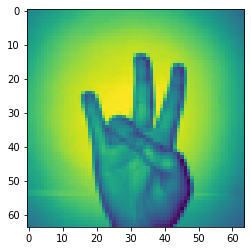

In [ ]:
plt.imshow(xtest[1])

In [ ]:
ytest[1] # Actual output of the input Xtest[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
img_classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               2097664   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 2,231,562
Trainable params: 2,231,562
Non-trainable params: 0
_________________________________________________________________


input layer neurons = 4096

hidden layer-1 neurons = 512

Weights in the the first layer (b/w inp and hid1) = 4096*512 = 2097152

Bias in the first hidden layer = 512

Total number of parameter in the first layer = 4096*512 +512 = 2097664

Number of neurons in the second hidden layer = 256

Total number of parameter in the second layer(b/w hid 1 and hid 2) = 512*256 +256 = 131328

Number of neurons in the output layer = 10

Total number of parameter in the last layer(b/w hid 2 and output) = 256*10 +10 = 2570

In total this network need to train 2097664+131328+2570 = 2,231,562 parameters. 
